In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# load train dataset
usecols=['date', 'store_nbr', 'family', 'sales', 'onpromotion']
dtype = {
    'store_nbr': 'category',
    'family': 'category',
    'sales': 'float32',
    'onpromotion': 'uint64',
}

df_sales = pd.read_csv(
    '../data/train.csv',
    usecols=usecols,
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)
df_sales['date'] = df_sales.date.dt.to_period('D')
df_sales

,date,store_nbr,family,sales,onpromotion
0,2013-01-01,1,AUTOMOTIVE,0.000000,0
1,2013-01-01,1,BABY CARE,0.000000,0
2,2013-01-01,1,BEAUTY,0.000000,0
3,2013-01-01,1,BEVERAGES,0.000000,0
4,2013-01-01,1,BOOKS,0.000000,0
...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.132996,15
3000884,2017-08-15,9,PREPARED FOODS,154.552994,8
3000885,2017-08-15,9,PRODUCE,2419.729004,148
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,10


In [14]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 5 columns):
 #   Column       Dtype    
---  ------       -----    
 0   date         period[D]
 1   store_nbr    category 
 2   family       category 
 3   sales        float32  
 4   onpromotion  uint64   
dtypes: category(2), float32(1), period[D](1), uint64(1)
memory usage: 63.0 MB


In [30]:
total_sales = (
    df_sales
    .groupby('date').sum()
    .squeeze()
)
total_sales = total_sales['sales']
total_sales

date
2013-01-01      2511.618896
2013-01-02    496092.406250
2013-01-03    361461.218750
2013-01-04    354459.687500
2013-01-05    477350.125000
                  ...      
2017-08-11    826373.750000
2017-08-12    792630.562500
2017-08-13    865639.687500
2017-08-14    760922.375000
2017-08-15    762661.937500
Freq: D, Name: sales, Length: 1684, dtype: float32

<AxesSubplot:xlabel='date'>

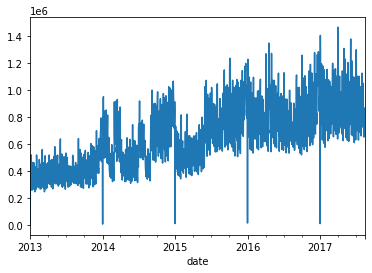

In [27]:
total_sales.plot()

In [37]:
# load transactions dataset
usecols=['date', 'store_nbr', 'transactions']
dtype = {
    'store_nbr': 'category',
    'transactions': 'float32',
}

df_transactions = pd.read_csv(
    '../data/transactions.csv',
    usecols=usecols,
    dtype=dtype,
    parse_dates=['date'],
    infer_datetime_format=True,
)
df_transactions['date'] = df_transactions.date.dt.to_period('D')
df_transactions


,date,store_nbr,transactions
0,2013-01-01,25,770.0
1,2013-01-02,1,2111.0
2,2013-01-02,2,2358.0
3,2013-01-02,3,3487.0
4,2013-01-02,4,1922.0
...,...,...,...
83483,2017-08-15,50,2804.0
83484,2017-08-15,51,1573.0
83485,2017-08-15,52,2255.0
83486,2017-08-15,53,932.0


In [40]:
total_transactions = (
    df_transactions
    .groupby('date').sum()
    .squeeze()
)
total_transactions

date
2013-01-01      770.0
2013-01-02    93215.0
2013-01-03    78504.0
2013-01-04    78494.0
2013-01-05    93573.0
               ...   
2017-08-11    89551.0
2017-08-12    89927.0
2017-08-13    85993.0
2017-08-14    85448.0
2017-08-15    86561.0
Freq: D, Name: transactions, Length: 1682, dtype: float32

In [41]:
total_sales.corr(total_transactions)

0.6765087009817828

In [51]:
# load stores dataset
dtype = {
    'store_nbr': 'category',
    'city': 'category',
    'state': 'category',
    'type': 'category',
    'cluster': 'category'
}

df_stores = pd.read_csv(
    '../data/stores.csv',
    dtype=dtype,
)
df_stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [54]:
# join test to stores
df_sales = pd.merge(df_sales, df_stores, how='left', on='store_nbr')
df_sales

,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,2013-01-01,1,AUTOMOTIVE,0.000000,0,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.000000,0,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.000000,0,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.000000,0,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.000000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...
3000883,2017-08-15,9,POULTRY,438.132996,15,Quito,Pichincha,B,6
3000884,2017-08-15,9,PREPARED FOODS,154.552994,8,Quito,Pichincha,B,6
3000885,2017-08-15,9,PRODUCE,2419.729004,148,Quito,Pichincha,B,6
3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000000,10,Quito,Pichincha,B,6


<AxesSubplot:xlabel='date'>

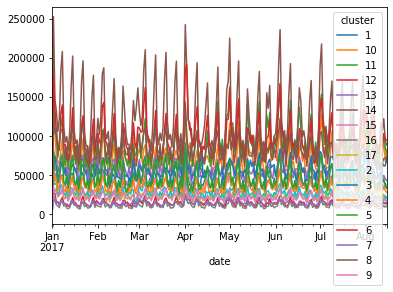

In [66]:
cluster_sales = (
    df_sales
    .groupby(['date', 'cluster']).sum()
    .squeeze()
)['sales'].unstack()
cluster_sales.loc['2017'].plot()

<AxesSubplot:xlabel='date'>

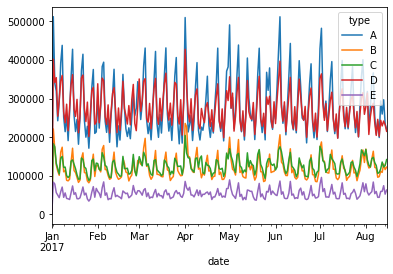

In [67]:
type_sales = (
    df_sales
    .groupby(['date', 'type']).sum()
    .squeeze()
)['sales'].unstack()
type_sales.loc['2017'].plot()

<AxesSubplot:xlabel='date'>

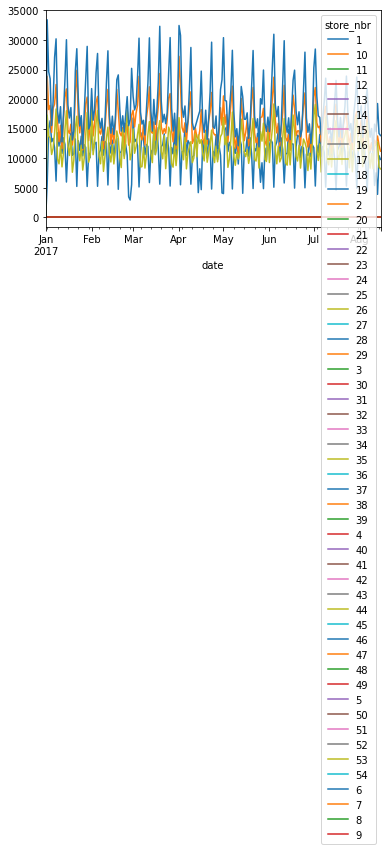

In [72]:
type_D_13_sales = (
    df_sales[(df_sales['type'] == 'D') & (df_sales['cluster'] == '13')]
    .groupby(['date', 'store_nbr']).sum()
    .squeeze()
)['sales'].unstack()
type_D_13_sales.loc['2017'].plot()

In [73]:
type_D_13_sales.loc['2017']

store_nbr,1,10,11,12,13,14,15,16,17,18,...,5,50,51,52,53,54,6,7,8,9
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
2017-01-02,5624.025879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,17306.611328,0.0,33420.296875,0.0,0.0,0.0
2017-01-03,14932.340820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13771.746094,0.0,24664.802734,0.0,0.0,0.0
2017-01-04,16356.818359,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,13442.102539,0.0,23453.037109,0.0,0.0,0.0
2017-01-05,12789.186523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10646.760742,0.0,15548.572266,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-08-11,5403.742188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12033.407227,0.0,15775.921875,0.0,0.0,0.0
2017-08-12,7543.623047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12316.158203,0.0,14502.507812,0.0,0.0,0.0
2017-08-13,3902.781982,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12750.175781,0.0,19261.919922,0.0,0.0,0.0
